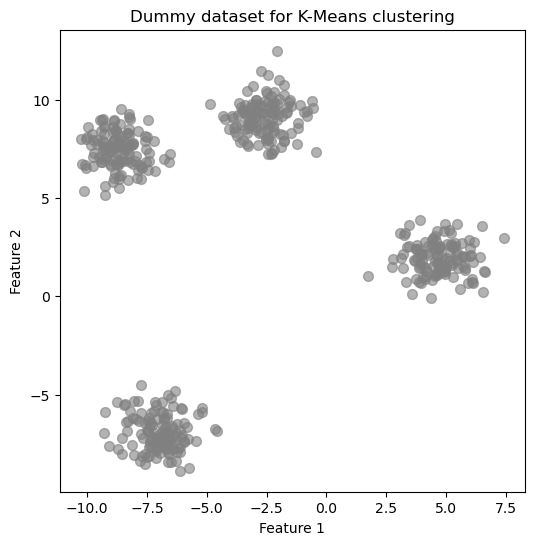

X shape: (500, 2)


In [14]:
# kmeans_dummy_data.py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# ---- Generate synthetic 2D data ----
X, y_true = make_blobs(
    n_samples=500,      # total points
    centers=4,          # number of true clusters
    cluster_std=0.9,    # spread of clusters
    random_state=42
)

# ---- Visualize ----
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], s=50, c='gray', alpha=0.6)
plt.title("Dummy dataset for K-Means clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Optional: inspect data shape
print("X shape:", X.shape)


In [25]:

def plot_clusters(X, centroids, labels, iteration):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=100)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=150, marker='X')
    plt.title(f"Iteration {iteration}")
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

def kmeans_stepwise(X, k=3 ,max_iters=20):
    np.random.seed(42)
    # Step 1: Assign points to nearest centroid
    centroids=X[np.random.choice(X.shape[0],k,replace=False)]

    for i in range(max_iters):
         # X <- say 500x2 and centroid is kx2 so np.newaxis a dummpy axis so that X<-9xkx2 == centroid <-kx2
        distance=np.linalg.norm(X[:,np.newaxis]-centroids,axis=2)
        print(f"distance at step:{i}\nDistance: {distance}\nCentroid: {centroids}")
        labels=np.argmin(distance,axis=1) # give minimum distanced centroid 
         # Visualize current iteration
        plot_clusters(X, centroids, labels, iteration=i)

        # Step 2: Compute new centroids
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

            # Stop if converged
        if np.allclose(centroids, new_centroids):
            print(f"Converged at iteration {i}")
            break

        centroids = new_centroids

    return labels, centroids



distance at step:0
Distance: [[ 5.38141297  0.91926771  1.72091928  1.39733274]
 [17.23855124 13.65203921 14.36239229 14.27924103]
 [12.42018725 16.27846117 17.12411044 16.79557428]
 ...
 [15.0836356  12.18641629 12.99456495 12.86025169]
 [15.66641908 12.72088581 13.51903848 13.39043023]
 [ 9.94529659 14.23213434 15.0283229  14.69786372]]
Centroid: [[-2.99914208  9.11411646]
 [-8.72303378  6.71057642]
 [-9.3564018   7.43333175]
 [-9.03719551  7.34772017]]


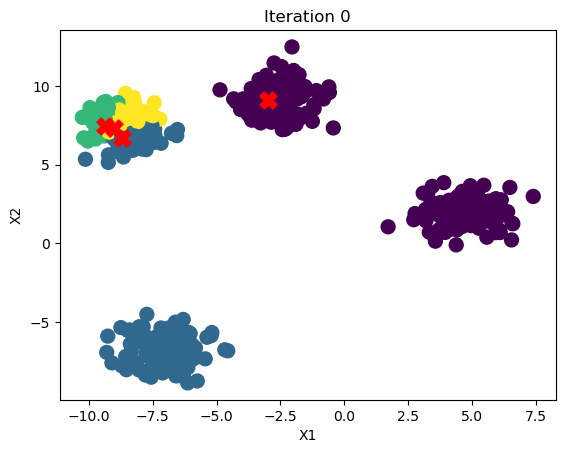

distance at step:1
Distance: [[ 8.94305793 10.16576017  2.08199575  1.46059551]
 [16.19026225  4.00025692 14.76094638 14.93631406]
 [ 6.99731747 14.69500473 17.44735725 16.52849989]
 ...
 [13.65321506  1.91917774 13.41803139 13.4255901 ]
 [14.20108904  2.47327453 13.9401572  13.96644693]
 [ 4.58450385 14.16436544 15.32260539 14.35667607]]
Centroid: [[ 1.06035818  5.50670358]
 [-7.30945398 -3.46306041]
 [-9.54655575  7.83002457]
 [-8.48166463  7.98452857]]


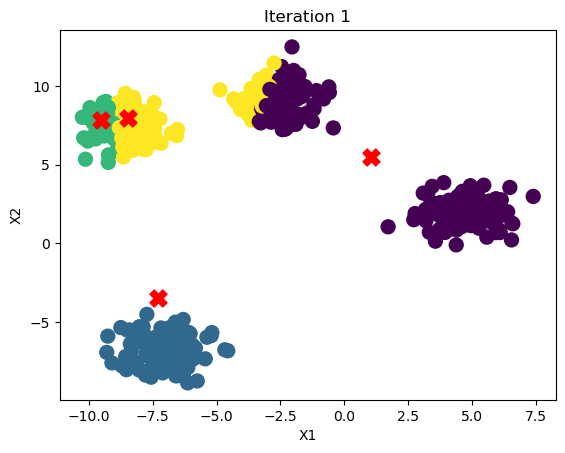

distance at step:2
Distance: [[ 9.8300036  13.61710715  1.78417353  1.73966349]
 [16.23379714  2.31815073 14.29469983 15.20061312]
 [ 5.97386884 15.85347574 17.19240383 14.96458874]
 ...
 [13.65488863  1.53620474 12.94424809 13.43552512]
 [14.1866693   1.03135672 13.4666056  13.9998064 ]
 [ 3.58540513 15.8579369  15.10573613 12.72366885]]
Centroid: [[ 1.85399209  4.85967753]
 [-6.98883113 -6.90202274]
 [-9.45583412  7.36494819]
 [-6.71772724  8.04951664]]


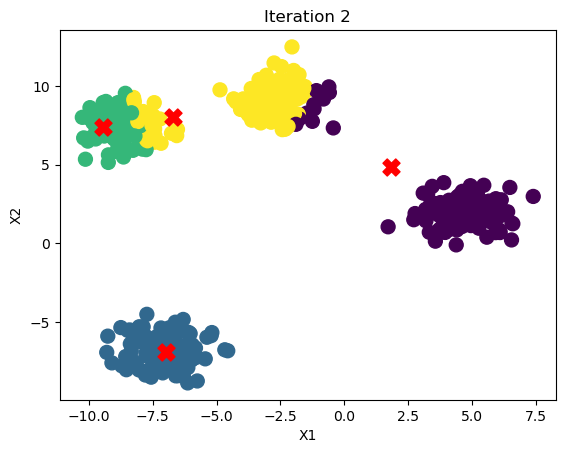

distance at step:3
Distance: [[12.60884443 13.61710715  1.35718119  4.70529329]
 [16.4732152   2.31815073 14.33289303 16.78495063]
 [ 2.83390105 15.85347574 16.74384112 12.76806165]
 ...
 [13.84267787  1.53620474 12.90103745 14.68126377]
 [14.30650342  1.03135672 13.43271961 15.26342281]
 [ 1.23268256 15.8579369  14.63903607 10.33461313]]
Centroid: [[ 4.12538964  2.60739878]
 [-6.98883113 -6.90202274]
 [-8.96119303  7.39975006]
 [-3.63267544  8.8678156 ]]


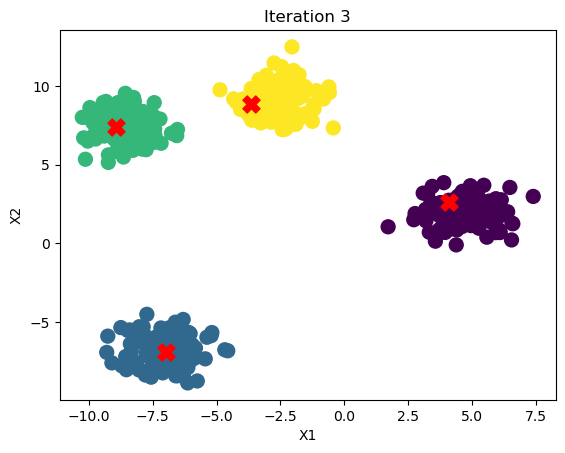

distance at step:4
Distance: [[13.39276214 13.61710715  1.1673746   5.734654  ]
 [16.58412223  2.31815073 14.38415773 17.36409621]
 [ 2.01630514 15.85347574 16.51452949 12.08946571]
 ...
 [13.96033822  1.53620474 12.90949963 15.17317645]
 [14.40097022  1.03135672 13.4459152  15.75594112]
 [ 1.47726471 15.8579369  14.39755008  9.59941686]]
Centroid: [[ 4.71362999  1.92878701]
 [-6.98883113 -6.90202274]
 [-8.69721653  7.44225918]
 [-2.59291363  9.08462016]]


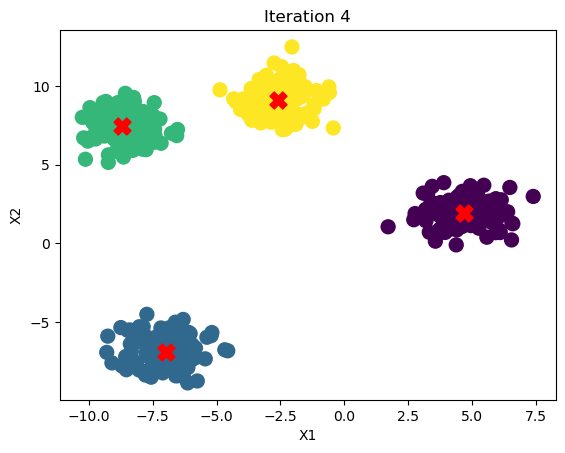

Converged at iteration 4

Final centroids:
 [[ 4.71362999  1.92878701]
 [-6.98883113 -6.90202274]
 [-8.69721653  7.44225918]
 [-2.59291363  9.08462016]]


In [26]:
labels, centroids = kmeans_stepwise(X, k=4)
print("\nFinal centroids:\n", centroids)
